## A notebook to test for defocus

This notebook was inspired by this [question](https://forum.image.sc/t/noise-in-fluorescence-images/82443).

The researcher had noisy 2D images that potentially also had [spherical aberration](https://forum.image.sc/t/noise-in-fluorescence-images/82443/4) and defocus.  The main purpose of the notebook is to explore the 2D XY slices of a 3D PSF to understand how the shape of the 2D PSF would change with defocus and aberration.

## First load the images

In [1]:
from skimage.io import imread
import os

tnia_images_path = r"D:\images\tnia-python-images"

im= imread(os.path.join(tnia_images_path, r"imagesc\2023_06_15_noise_in_fluorescence_images\ibpB_wt012.tif"))
print(im.shape)            

(2, 1024, 1024)


## Visualize the images

(we could also potentially visualize in Napari)

257 4095 72 2771


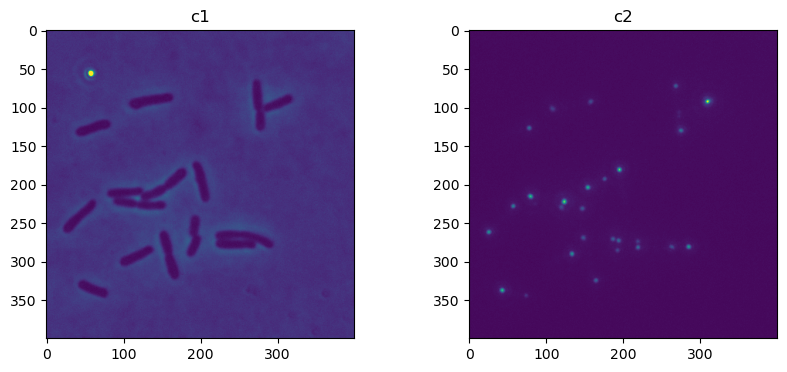

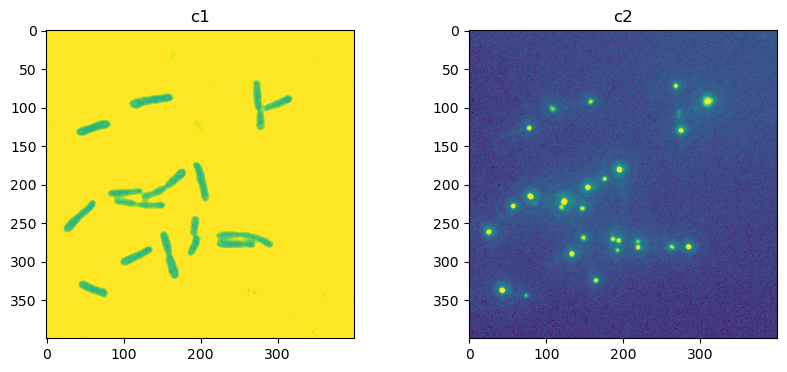

In [3]:
from tnia.plotting.plt_helper import imshow_multi2d
import numpy as np

roi = np.s_[:,100:500, 600:1000]
im_ = im[roi]


ims=[im_[0,:,:], im_[1,:,:]]

print(ims[0].min(), ims[0].max(), ims[1].min(), ims[1].max())

fig = imshow_multi2d(ims, ['c1', 'c2'], 1, 2, width=10, height=4,  vmin=None, vmax=None)
fig = imshow_multi2d(ims, ['c1', 'c2'], 1, 2, width=10, height=4,  vmin=122, vmax=700, gamma=0.5)

## View in Napari

In [4]:
import napari

Viewer = napari.Viewer()
Viewer.add_image(im_, name='im_')

napari.manifest -> 'napari-hello' could not be imported: Cannot find module 'napari_plugins' declared in entrypoint: 'napari_plugins:napari.yaml'


<Image layer 'im_' at 0x2756a89e1f0>

## Create 3D PSF

Here we create a 3D PSF and then show an interactive XYZ slice projection.  We can then adjust the z index of the slice projection to try and see how an aberrated PSF would change 

In [9]:
from tnia.plotting.interactive_projections import show_xyz_slice_interactive
from tnia.deconvolution.psfs import gibson_lanni_3D

x_voxel_size = 0.101
z_voxel_size=.2

xy_psf_dim=65
z_psf_dim=19

NA=1.4
ni=1.5
ns=1.4
d=5
w=0.4

psf  = gibson_lanni_3D(NA, ni, ns, x_voxel_size, z_voxel_size, xy_psf_dim, z_psf_dim, d, w, use_psfm=True)
psf = psf.astype('float32')
fig = show_xyz_slice_interactive(psf, sxy=1, sz=3, figsize=(10,10), colormap=None, vmax=psf.max()/10, gamma=0.2)

interactive(children=(IntSlider(value=32, description='x', max=64), IntSlider(value=32, description='y', max=6…